# **Бинарная классификация с помощью линейной модели**

In [ ]:
from sklearn import datasets

X, y = datasets.make_classification(
    n_samples = 20,
    n_features = 2,
    n_informative = 2,
    n_redundant = 0,
    n_classes = 2,
    random_state = 2,
)
y

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
np.arange(start = -1, stop = 1.1, step = 0.1)

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01,
        1.00000000e+00])

In [ ]:
np.linspace(start = -1, stop = 1, num= 21, retstep=True)

(array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 0.1)

In [ ]:
def summa(*arg):
  print(arg)
  summ = 0
  for digit in arg:
    summ += digit
  return summ

In [ ]:
summa(1, 3, 5, 6 , 7)

(1, 3, 5, 6, 7)


22

In [ ]:
def print_dict(**kwargs):
  print(kwargs)
  for key, value in kwargs.items():
    print('key =',key, 'value =', value)

In [ ]:
print_dict(word = 'Hello!', word2 = 'World')

{'word': 'Hello!', 'word2': 'World'}
key = word value = Hello!
key = word2 value = World


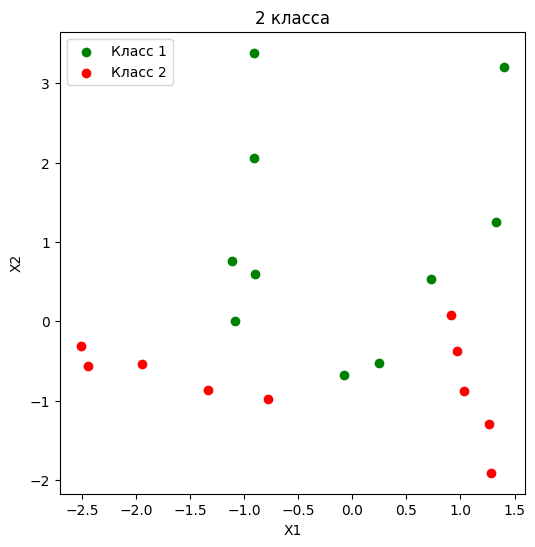

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Класс 1')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Класс 2')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title('2 класса')
plt.legend();

In [ ]:
import numpy as np
y = np.array([-1 if i == 1 else 1 for i in y])
y

array([-1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,
        1, -1,  1])

Accuracy

In [ ]:
def predict(X, w):
  return X.dot(w.T)/np.abs(X.dot(w.T))

In [ ]:
def accuracy(y_pred, y_fact):
  return np.abs(y_pred - y_fact).sum()/2

Создание класса

In [183]:
class liner_classification_model:

  def __init__(self):
    self.params = {'weights': np.array([[1.0, -1.0]])}

  def predict(self, X):
    return X.dot((self.params['weights']).T) / np.abs(X.dot((self.params['weights']).T))

  def fit(self, X, y_fact):
    optimal_accur = 0
    optimal_w = 1
    for w in np.arange(start = -1, stop = 1.1, step = 0.1):
      w1 = round(w, 1)
      self.set_params(weights = np.array([[w1, -1.0]]))
      accur = self.score(self.predict(X), y_fact.reshape(-1, 1))
      print(f"w= {w1:5.2f}, accuracy=  {accur}")
      if accur > optimal_accur:
        optimal_accur = accur
        optimal_w = w1
    self.set_params(weights = np.array([[optimal_w, -1.0]])) 

  def get_params(self):
    return self.params
  
  def set_params(self, **params):
    for key, value in params.items():
      self.params[key] = value

  def score(self, y_pred, y_fact, sample_weight=None):
    return accuracy(y_pred, y_fact, sample_weight)

def accuracy(y_pred, y_fact, sample_weight=None):
  if (sample_weight is not None):
    return (len(y_pred) - (np.abs(y_pred - y_fact)*sample_weight).sum()/2)/len(y_pred)
  else:
    return (len(y_pred) - np.abs(y_pred - y_fact).sum()/2)/len(y_pred)

In [184]:
lin_class = liner_classification_model()
y_pred_without_fit = lin_class.predict(X)
lin_class.score(y_pred_without_fit, y.reshape(-1, 1))

0.6

In [ ]:
y_fact = np.array([1, -1, 1, 1])
y_pred = np.array([1, 1, 1, 1])
sample_weight = np.array([1, 2, 1, 1])
accuracy(y_pred, y_fact, sample_weight)

0.5

In [ ]:
lin_class.get_params()

{'weights': array([[ 1., -1.]])}

In [ ]:
lin_class.set_params(weights = [[0.0, -1.0]])
lin_class.get_params()

{'weights': array([[ 0., -1.]])}

In [185]:
lin_class.fit(X, y)
y_pred_after_fit = lin_class.predict(X)
print('Новые веса: ', lin_class.params['weights'])
lin_class.score(y_pred_after_fit, y.reshape(-1, 1))

w= -1.00, accuracy=  0.6
w= -0.90, accuracy=  0.6
w= -0.80, accuracy=  0.65
w= -0.70, accuracy=  0.65
w= -0.60, accuracy=  0.75
w= -0.50, accuracy=  0.75
w= -0.40, accuracy=  0.75
w= -0.30, accuracy=  0.8
w= -0.20, accuracy=  0.8
w= -0.10, accuracy=  0.8
w= -0.00, accuracy=  0.85
w=  0.10, accuracy=  0.9
w=  0.20, accuracy=  0.85
w=  0.30, accuracy=  0.75
w=  0.40, accuracy=  0.75
w=  0.50, accuracy=  0.75
w=  0.60, accuracy=  0.75
w=  0.70, accuracy=  0.7
w=  0.80, accuracy=  0.65
w=  0.90, accuracy=  0.65
w=  1.00, accuracy=  0.6
Новые веса:  [[ 0.1 -1. ]]


0.9

Ручная реализация

**Список** источников:
1. https://academy.yandex.ru/handbook/ml/article/linear-models
2. https://www.youtube.com/watch?v=4z8VSsvZGKs&list=PLA0M1Bcd0w8zxDIDOTQHsX68MCDOAJDtj&index=7&ab_channel=selfedu
3. https://www.youtube.com/watch?v=VF4newaSUYQ&t=970s&ab_channel=%D0%A4%D0%9A%D0%9D%D0%92%D0%A8%D0%AD%E2%80%94%D0%B4%D0%B8%D1%81%D1%82%D0%B0%D0%BD%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D1%8F
4. https://www.youtube.com/watch?v=CCH-1gJo_z0&list=PLkJJmZ1EJno6CLyvD4DHc32Fed6cPBHje&ab_channel=machinelearrrning
5. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score
